In [361]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [362]:

df=pd.read_csv('D:\ML Real World Projects S.S (Udemy)\Cancellation of Booking/hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [363]:
def data_clean(col):
    col.fillna(0,inplace=True)
    #print(df.isnull().sum())

In [364]:
data_clean(df['agent'])

In [365]:
data_clean(df['company'])

In [366]:
df=df[df['children'].notna()]

In [367]:
df.isna().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            0
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
agent                               0
company                             0
days_in_waiting_list                0
customer_typ

In [368]:
df['country'].replace('nan','other',inplace=True)

In [369]:
df['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [370]:
filter=(df['children']==0) & (df['adults']==0) & (df['babies']==0)
df[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,1,No Deposit,0.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,0,No Deposit,0.0,174.0,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,0.0,0,SC,ESP,Groups,TA/TO,0,0,0,A,C,0,No Deposit,38.0,0.0,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,C,1,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,0.0,0,BB,CHE,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,7.0,0.0,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,0.0,0,SC,PRT,Complementary,Direct,0,0,0,E,K,0,No Deposit,0.0,0.0,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,0.0,0,SC,SWE,Online TA,TA/TO,0,0,0,A,K,2,No Deposit,425.0,0.0,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,0.0,0,SC,RUS,Online TA,TA/TO,0,0,0,A,K,1,No Deposit,9.0,0.0,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


In [371]:
df=df[~filter]

In [372]:
df.shape

(119206, 32)

In [373]:
cat_features=[col for col in df.columns if df[col].dtype == 'O']

In [374]:
cat_features

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [375]:
df['reservation_status_date']=pd.to_datetime(df['reservation_status_date'])

In [376]:
df['res_year']=df['reservation_status_date'].dt.year
df['res_month']=df['reservation_status_date'].dt.month
df['res_day']=df['reservation_status_date'].dt.day

In [377]:
def meal(x):
    if x in ('BB'):
        return 'BB'
    elif x in ('HB'):
        return 'HB'
    elif x in ('SC'):
        return 'SC'
    else:
        return 'other'  

In [378]:
df['Meal']=df['meal'].apply(meal)

In [379]:
def ms(x):
    if x in ('Online TA'):
        return 'Online TA'
    elif x in ('Groups'):
        return 'Groups'
    elif x in ('Offline TA/TO'):
        return 'Offline TA/TO'
    else:
        return 'other'

In [380]:
df['Market_segment']=df['market_segment'].apply(ms)

In [381]:
def AR(x):
    if x in ('A'):
        return 'A'
    elif x in ('D'):
        return 'D'
    elif x in ('E'):
        return 'E' 
    else:
        return 'other'

In [382]:
df['Assigned_room_type']=df['assigned_room_type'].apply(AR)


In [383]:
def CT(x):
    if x in ('Transient'):
        return 'Transient'
    elif x in ('Transient-Party'):
        return 'Transient-Party'
    else:
        return 'other'

In [384]:
df['Customer_type']=df['customer_type'].apply(CT)

In [385]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,res_year,res_month,res_day,Meal,Market_segment,Assigned_room_type,Customer_type
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015,7,1,BB,other,other,Transient
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015,7,1,BB,other,other,Transient
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015,7,2,BB,other,other,Transient
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015,7,2,BB,other,A,Transient
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015,7,3,BB,Online TA,A,Transient


In [386]:
data=df

In [387]:
data.drop(['meal','market_segment',
'assigned_room_type','customer_type','reservation_status','reservation_status_date','distribution_channel','reserved_room_type'],axis=1,inplace=True)

In [388]:
pd.set_option('display.max_columns',35)

In [389]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,res_year,res_month,res_day,Meal,Market_segment,Assigned_room_type,Customer_type
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,PRT,0,0,0,3,No Deposit,0.0,0.0,0,0.0,0,0,2015,7,1,BB,other,other,Transient
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,PRT,0,0,0,4,No Deposit,0.0,0.0,0,0.0,0,0,2015,7,1,BB,other,other,Transient
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,GBR,0,0,0,0,No Deposit,0.0,0.0,0,75.0,0,0,2015,7,2,BB,other,other,Transient
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,GBR,0,0,0,0,No Deposit,304.0,0.0,0,75.0,0,0,2015,7,2,BB,other,A,Transient
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,GBR,0,0,0,0,No Deposit,240.0,0.0,0,98.0,0,1,2015,7,3,BB,Online TA,A,Transient


In [390]:
cat_features=[col for col in data.columns if data[col].dtype == 'O']

In [391]:
cat_features

['hotel',
 'arrival_date_month',
 'country',
 'deposit_type',
 'Meal',
 'Market_segment',
 'Assigned_room_type',
 'Customer_type']

In [392]:
num_features=[col for col in data.columns if data[col].dtype != 'O']

In [433]:
numerical_features=data[num_features]

In [434]:
numerical_features

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,res_year,res_month,res_day
0,0,5.837730,2015,27,1,0,0,2,0.0,0,0,0,0,3,0.0,0.0,0,0.000000,0,0,2015,7,1
1,0,6.603944,2015,27,1,0,0,2,0.0,0,0,0,0,4,0.0,0.0,0,0.000000,0,0,2015,7,1
2,0,2.079442,2015,27,1,0,1,1,0.0,0,0,0,0,0,0.0,0.0,0,4.330733,0,0,2015,7,2
3,0,2.639057,2015,27,1,0,1,1,0.0,0,0,0,0,0,304.0,0.0,0,4.330733,0,0,2015,7,2
4,0,2.708050,2015,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0.0,0,4.595120,0,1,2015,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,3.178054,2017,35,30,2,5,2,0.0,0,0,0,0,0,394.0,0.0,0,4.576153,0,0,2017,9,6
119386,0,4.634729,2017,35,31,2,5,3,0.0,0,0,0,0,0,9.0,0.0,0,5.422436,0,2,2017,9,7
119387,0,3.555348,2017,35,31,2,5,2,0.0,0,0,0,0,0,9.0,0.0,0,5.067079,0,4,2017,9,7
119388,0,4.700480,2017,35,31,2,5,2,0.0,0,0,0,0,0,89.0,0.0,0,4.657763,0,0,2017,9,7


In [436]:
y=numerical_features['is_canceled']
x=numerical_features.drop('is_canceled',axis=1)

In [437]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(x,y)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [438]:
feature_sel_model.get_support()

array([ True,  True,  True,  True, False,  True, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [439]:
cols=x.columns

In [440]:
selected_feat = cols[(feature_sel_model.get_support())]

In [441]:
selected_feat

Index(['lead_time', 'arrival_date_year', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_week_nights',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'res_year',
       'res_month', 'res_day'],
      dtype='object')

In [442]:
selected_feat.shape

(17,)

AttributeError: 'list' object has no attribute 'shape'

In [393]:
num_features

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'res_year',
 'res_month',
 'res_day']

In [394]:
data.shape

(119206, 31)

In [395]:
data=data[data['country'].notna()]

In [ ]:
data['country'].unique()

In [399]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,res_year,res_month,res_day,Meal,Market_segment,Assigned_room_type,Customer_type
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,PRT,0,0,0,3,No Deposit,0.0,0.0,0,0.0,0,0,2015,7,1,BB,other,other,Transient
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,PRT,0,0,0,4,No Deposit,0.0,0.0,0,0.0,0,0,2015,7,1,BB,other,other,Transient
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,GBR,0,0,0,0,No Deposit,0.0,0.0,0,75.0,0,0,2015,7,2,BB,other,other,Transient
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,GBR,0,0,0,0,No Deposit,304.0,0.0,0,75.0,0,0,2015,7,2,BB,other,A,Transient
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,GBR,0,0,0,0,No Deposit,240.0,0.0,0,98.0,0,1,2015,7,3,BB,Online TA,A,Transient


In [401]:
from sklearn.preprocessing import LabelEncoder

In [402]:
lb = LabelEncoder()
data.iloc[:,0]=lb.fit_transform(data.iloc[:,0])
lb1 = LabelEncoder()
data.iloc[:,4]=lb1.fit_transform(data.iloc[:,4])
lb2 = LabelEncoder()
data.iloc[:,17]=lb2.fit_transform(data.iloc[:,17])
lb3 = LabelEncoder()
data.iloc[:,27]=lb3.fit_transform(data.iloc[:,27])
lb4 = LabelEncoder()
data.iloc[:,28]=lb4.fit_transform(data.iloc[:,28])
lb5 = LabelEncoder()
data.iloc[:,29]=lb5.fit_transform(data.iloc[:,29])
lb6 = LabelEncoder()
data.iloc[:,30]=lb6.fit_transform(data.iloc[:,30])

C:\Users\ANSHUL\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [403]:
lb7 = LabelEncoder()
data.iloc[:,12]=lb7.fit_transform(data.iloc[:,12])

In [404]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,res_year,res_month,res_day,Meal,Market_segment,Assigned_room_type,Customer_type
0,1,0,342,2015,5,27,1,0,0,2,0.0,0,135,0,0,0,3,0,0.0,0.0,0,0.0,0,0,2015,7,1,0,3,3,0
1,1,0,737,2015,5,27,1,0,0,2,0.0,0,135,0,0,0,4,0,0.0,0.0,0,0.0,0,0,2015,7,1,0,3,3,0
2,1,0,7,2015,5,27,1,0,1,1,0.0,0,59,0,0,0,0,0,0.0,0.0,0,75.0,0,0,2015,7,2,0,3,3,0
3,1,0,13,2015,5,27,1,0,1,1,0.0,0,59,0,0,0,0,0,304.0,0.0,0,75.0,0,0,2015,7,2,0,3,0,0
4,1,0,14,2015,5,27,1,0,2,2,0.0,0,59,0,0,0,0,0,240.0,0.0,0,98.0,0,1,2015,7,3,0,2,0,0


In [405]:
data.shape

(118728, 31)

In [406]:
categorical_features=df[cat_features]

In [407]:
categorical_features

,hotel,arrival_date_month,country,deposit_type,Meal,Market_segment,Assigned_room_type,Customer_type
0,Resort Hotel,July,PRT,No Deposit,BB,other,other,Transient
1,Resort Hotel,July,PRT,No Deposit,BB,other,other,Transient
2,Resort Hotel,July,GBR,No Deposit,BB,other,other,Transient
3,Resort Hotel,July,GBR,No Deposit,BB,other,A,Transient
4,Resort Hotel,July,GBR,No Deposit,BB,Online TA,A,Transient
...,...,...,...,...,...,...,...,...
119385,City Hotel,August,BEL,No Deposit,BB,Offline TA/TO,A,Transient
119386,City Hotel,August,FRA,No Deposit,BB,Online TA,E,Transient
119387,City Hotel,August,DEU,No Deposit,BB,Online TA,D,Transient
119388,City Hotel,August,GBR,No Deposit,BB,Online TA,A,Transient


In [408]:
"""for col in cat_features:
    if col in data.columns:
        i=data.columns.get_loc(col)
       data.iloc[:,i]=data.apply(lambda i:le.fit_transform(data[i]))#,axis=0,result_type='expand') """

"for col in cat_features:\n    if col in data.columns:\n        i=data.columns.get_loc(col)\n       data.iloc[:,i]=data.apply(lambda i:le.fit_transform(data[i]))#,axis=0,result_type='expand') "

C:\Users\ANSHUL\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='lead_time', ylabel='Density'>

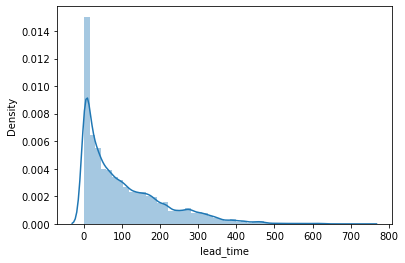

In [409]:
sns.distplot(data['lead_time'])

In [410]:
import numpy as np

def handle_outlier(col):
    data[col]=np.log1p(data[col])

In [411]:
handle_outlier('lead_time')

<ipython-input-410-1a10f6ddf552>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col]=np.log1p(data[col])


C:\Users\ANSHUL\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='lead_time', ylabel='Density'>

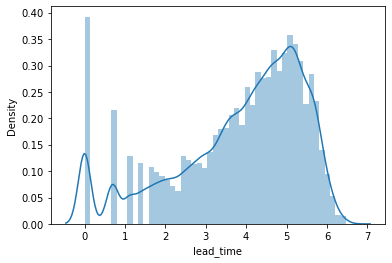

In [412]:
sns.distplot(data['lead_time'])

C:\Users\ANSHUL\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='adr', ylabel='Density'>

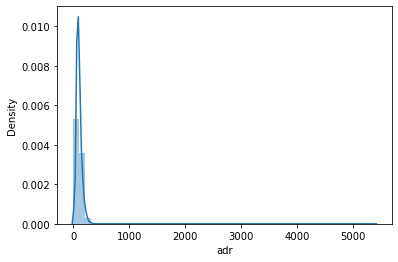

In [413]:
sns.distplot(data['adr'])

In [414]:
handle_outlier('adr')

C:\Users\ANSHUL\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-410-1a10f6ddf552>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col]=np.log1p(data[col])


C:\Users\ANSHUL\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='adr', ylabel='Density'>

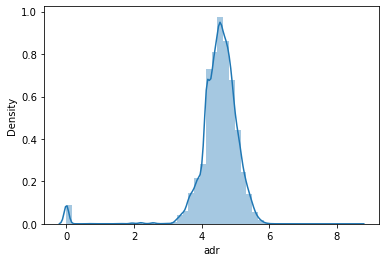

In [415]:
sns.distplot(data['adr'])

In [416]:
## separate dependent & independent features


In [417]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,res_year,res_month,res_day,Meal,Market_segment,Assigned_room_type,Customer_type
0,1,0,5.837730,2015,5,27,1,0,0,2,0.0,0,135,0,0,0,3,0,0.0,0.0,0,0.000000,0,0,2015,7,1,0,3,3,0
1,1,0,6.603944,2015,5,27,1,0,0,2,0.0,0,135,0,0,0,4,0,0.0,0.0,0,0.000000,0,0,2015,7,1,0,3,3,0
2,1,0,2.079442,2015,5,27,1,0,1,1,0.0,0,59,0,0,0,0,0,0.0,0.0,0,4.330733,0,0,2015,7,2,0,3,3,0
3,1,0,2.639057,2015,5,27,1,0,1,1,0.0,0,59,0,0,0,0,0,304.0,0.0,0,4.330733,0,0,2015,7,2,0,3,0,0
4,1,0,2.708050,2015,5,27,1,0,2,2,0.0,0,59,0,0,0,0,0,240.0,0.0,0,4.595120,0,1,2015,7,3,0,2,0,0


In [418]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [419]:
np.any(np.isnan(data))

True

In [420]:
data.dropna(inplace=True)

<ipython-input-420-f1116dacf2bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [421]:
np.all(np.isfinite(data))

True

In [443]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,res_year,res_month,res_day,Meal,Market_segment,Assigned_room_type,Customer_type
0,1,0,5.837730,2015,5,27,1,0,0,2,0.0,0,135,0,0,0,3,0,0.0,0.0,0,0.000000,0,0,2015,7,1,0,3,3,0
1,1,0,6.603944,2015,5,27,1,0,0,2,0.0,0,135,0,0,0,4,0,0.0,0.0,0,0.000000,0,0,2015,7,1,0,3,3,0
2,1,0,2.079442,2015,5,27,1,0,1,1,0.0,0,59,0,0,0,0,0,0.0,0.0,0,4.330733,0,0,2015,7,2,0,3,3,0
3,1,0,2.639057,2015,5,27,1,0,1,1,0.0,0,59,0,0,0,0,0,304.0,0.0,0,4.330733,0,0,2015,7,2,0,3,0,0
4,1,0,2.708050,2015,5,27,1,0,2,2,0.0,0,59,0,0,0,0,0,240.0,0.0,0,4.595120,0,1,2015,7,3,0,2,0,0


In [444]:
data.shape

(118727, 31)

In [450]:
numerical_features.columns

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'res_year', 'res_month', 'res_day'],
      dtype='object')

In [451]:
numerical_features.shape

(118727, 23)

In [447]:
selected_feat.shape

(17,)

In [448]:
selected_feat

Index(['lead_time', 'arrival_date_year', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_week_nights',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'res_year',
       'res_month', 'res_day'],
      dtype='object')

In [449]:
data.shape

(118727, 31)

In [452]:
numerical_features.columns

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'res_year', 'res_month', 'res_day'],
      dtype='object')

In [469]:
num_features=data[num_features]

In [473]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,res_year,res_month,res_day,Meal,Market_segment,Assigned_room_type,Customer_type
0,1,0,5.837730,2015,5,27,1,0,0,2,0.0,0,135,0,0,0,3,0,0.0,0.0,0,0.000000,0,0,2015,7,1,0,3,3,0
1,1,0,6.603944,2015,5,27,1,0,0,2,0.0,0,135,0,0,0,4,0,0.0,0.0,0,0.000000,0,0,2015,7,1,0,3,3,0
2,1,0,2.079442,2015,5,27,1,0,1,1,0.0,0,59,0,0,0,0,0,0.0,0.0,0,4.330733,0,0,2015,7,2,0,3,3,0
3,1,0,2.639057,2015,5,27,1,0,1,1,0.0,0,59,0,0,0,0,0,304.0,0.0,0,4.330733,0,0,2015,7,2,0,3,0,0
4,1,0,2.708050,2015,5,27,1,0,2,2,0.0,0,59,0,0,0,0,0,240.0,0.0,0,4.595120,0,1,2015,7,3,0,2,0,0


In [ ]:
data.drop(columns=['stays_in_weekend_nights','adults','children','babies','is_repeated_guest','arrival_date_week_number','arrival_date_year','arrival_date_day_of_month'],axis=1,inplace=True)

In [498]:
data.drop(columns=['arrival_date_week_number','arrival_date_year','arrival_date_day_of_month'],axis=1,inplace=True)

C:\Users\ANSHUL\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [471]:
num_features.shape

(118727, 18)

In [462]:
df1=pd.DataFrame(numerical_features)

In [464]:
categorical_features

,hotel,arrival_date_month,country,deposit_type,Meal,Market_segment,Assigned_room_type,Customer_type
0,Resort Hotel,July,PRT,No Deposit,BB,other,other,Transient
1,Resort Hotel,July,PRT,No Deposit,BB,other,other,Transient
2,Resort Hotel,July,GBR,No Deposit,BB,other,other,Transient
3,Resort Hotel,July,GBR,No Deposit,BB,other,A,Transient
4,Resort Hotel,July,GBR,No Deposit,BB,Online TA,A,Transient
...,...,...,...,...,...,...,...,...
119385,City Hotel,August,BEL,No Deposit,BB,Offline TA/TO,A,Transient
119386,City Hotel,August,FRA,No Deposit,BB,Online TA,E,Transient
119387,City Hotel,August,DEU,No Deposit,BB,Online TA,D,Transient
119388,City Hotel,August,GBR,No Deposit,BB,Online TA,A,Transient


In [ ]:
df2=pd.DataFrame(categorical_features)

In [ ]:
final=pd.concat([numerical_features],[categorical_features])

In [499]:
data.shape

(118727, 23)

In [500]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_month,stays_in_week_nights,country,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,res_year,res_month,res_day,Meal,Market_segment,Assigned_room_type,Customer_type
0,1,0,5.837730,5,0,135,0,0,3,0,0.0,0.0,0,0.000000,0,0,2015,7,1,0,3,3,0
1,1,0,6.603944,5,0,135,0,0,4,0,0.0,0.0,0,0.000000,0,0,2015,7,1,0,3,3,0
2,1,0,2.079442,5,1,59,0,0,0,0,0.0,0.0,0,4.330733,0,0,2015,7,2,0,3,3,0
3,1,0,2.639057,5,1,59,0,0,0,0,304.0,0.0,0,4.330733,0,0,2015,7,2,0,3,0,0
4,1,0,2.708050,5,2,59,0,0,0,0,240.0,0.0,0,4.595120,0,1,2015,7,3,0,2,0,0


In [501]:
y=data['is_canceled']
x=data.drop('is_canceled',axis=1)

In [502]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75,random_state=0)

In [503]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)

C:\Users\ANSHUL\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [504]:
y_pred=logreg.predict(x_test)

In [505]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[15643,  2895],
       [ 4713,  6431]], dtype=int64)

In [506]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
score

0.7436830402263999

In [507]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(logreg,x,y,cv=10)

C:\Users\ANSHUL\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ANSHUL\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [508]:
score

array([0.7017603 , 0.67051293, 0.74387265, 0.69957045, 0.69409585,
       0.60919734, 0.67312389, 0.75126348, 0.75235849, 0.77316375])

In [509]:
score.mean()

0.7068919126228778

In [488]:
#fit naive bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [489]:
### classifier models
models = []
models.append(('LogisticRegression', LogisticRegression()))
models.append(('Naive Bayes',GaussianNB()))
models.append(('RandomForest', RandomForestClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))

In [510]:
for name, model in models:
    print(name)
    model.fit(x_train, y_train)
    
    # Make predictions.
    predictions = model.predict(x_test)

    # Compute the error.
    from sklearn.metrics import confusion_matrix
    print(confusion_matrix(predictions, y_test))

    from sklearn.metrics import accuracy_score
    print(accuracy_score(predictions,y_test))
    print('\n')

LogisticRegression


C:\Users\ANSHUL\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[15643  4713]
 [ 2895  6431]]
0.7436830402263999


Naive Bayes
[[8570 1252]
 [9968 9892]]
0.6219931271477663


RandomForest
[[18160  1338]
 [  378  9806]]
0.9421871841520113


Decision Tree
[[17253  1156]
 [ 1285  9988]]
0.9177616063607573


KNN
[[17125  2551]
 [ 1413  8593]]
0.8664510477730611




In [492]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_week_nights', 'country',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'deposit_type', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'res_year', 'res_month', 'res_day', 'Meal',
       'Market_segment', 'Assigned_room_type', 'Customer_type'],
      dtype='object')

In [493]:
data.shape

(118727, 26)

In [496]:
data['company'].unique()

array([  0., 110., 113., 270., 178., 240., 154., 144., 307., 268.,  59.,
       204., 312., 318.,  94., 274., 174., 195., 223., 317., 281., 118.,
        53., 286.,  12.,  47., 324., 342., 373., 371.,  86.,  82., 218.,
        88.,  31., 397., 392., 405., 331., 367.,  20.,  83., 416.,  51.,
       395., 102.,  34.,  84., 360., 394., 382., 461., 478., 112., 486.,
       421.,   9., 308., 135., 224., 504., 269., 356., 498., 390., 513.,
       203., 263., 477., 521., 169., 515., 445., 337., 251., 428., 292.,
       388., 130., 250., 355., 254., 543., 531., 528., 120.,  81., 116.,
       530., 103.,  62.,  39.,  16.,  61.,  92., 501., 291., 290., 192.,
        43., 465., 287., 297., 207., 437., 165., 329., 272.,  28.,  77.,
       482., 200.,  42., 338., 108.,  72., 246., 319., 146., 159., 380.,
       323., 511., 407., 325., 278.,  80., 403., 399.,  14., 137., 343.,
       346., 347., 349., 289., 351., 353.,  54.,  99., 358., 361., 362.,
       366., 372., 365., 277., 109., 377., 379.,  2